In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvMoSa

read images

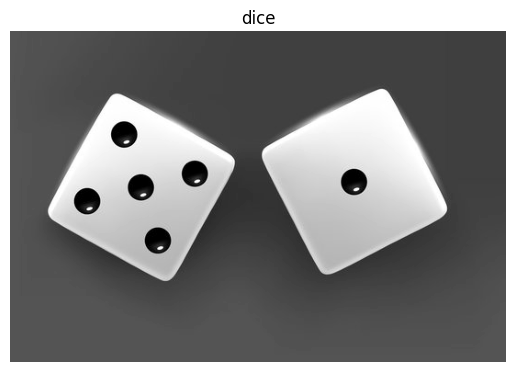

In [2]:
number = 3
image_org = cv2.imread(f'input/dice{number}.png')
image_dice = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(image_dice, cmap='gray')
plt.title('dice')
plt.axis('off')
plt.show()

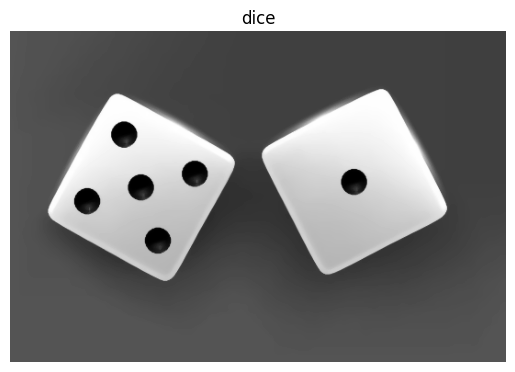

In [3]:
image_Blur = cv2.medianBlur(image_dice, 7)
plt.imshow(image_Blur, cmap='gray')
plt.title('dice')
plt.axis('off')
plt.show()

In [4]:
# # 1. Edge detection filter
# kernel = np.array([[-1 , -1 , -1],
#                    [-1 ,  8 , -1],
#                    [-1 , -1 , -1]])

# image_edge = cv2.filter2D(image_dice, -1, kernel)
# plt.imshow(image_edge, cmap='gray')
# plt.title('dice edge')
# plt.axis('off')
# plt.show()


In [5]:
# hist = cv2.calcHist([image_dice], [0], None, [256], [0, 256])
# plt.plot(hist)
# plt.show()

In [6]:
# claheFilter = cv2.createCLAHE(clipLimit=4, tileGridSize=(40, 40))
# image_dice_Blur2 = claheFilter.apply(image_Blur)
# plt.imshow(image_dice_Blur2, cmap='gray')
# plt.axis('off')
# plt.show()
# # hist = cv2.calcHist([image_dice2], [0], None, [256], [0, 256])
# # plt.plot(hist)
# # plt.show()

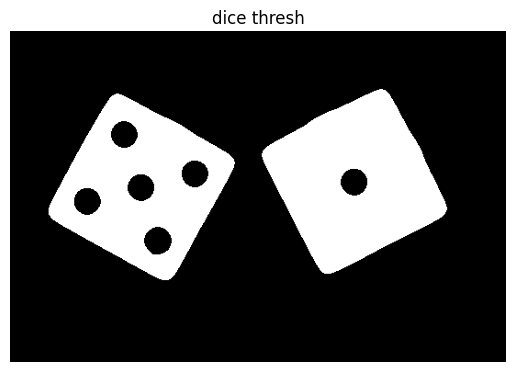

In [7]:
if number == 2 or number == 4:
    cv2thre = cv2.THRESH_BINARY_INV
else:
    cv2thre = cv2.THRESH_BINARY
_, image_thresh = cv2.threshold(image_Blur, 180, 255, cv2thre)

plt.imshow(image_thresh, cmap='gray')
plt.title('dice thresh')
plt.axis('off')
plt.show()

[5, 1]


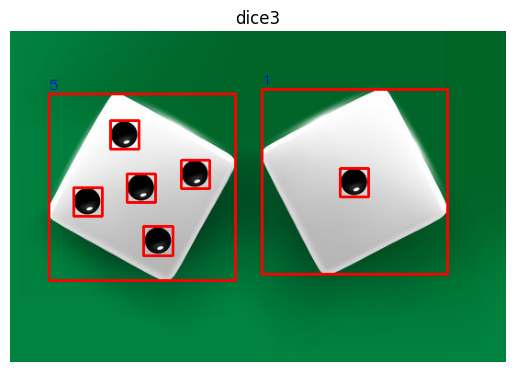

In [9]:
contours, hierarch = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

result = image_org.copy()
true_hierarch_index = []
output = []
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    if 5 < w < result.shape[0]/1.5 and 5 < h < result.shape[1]/1.5:
        cv2.rectangle(result, (x,y), (x+w, y+h), (0, 0, 255), 2)
        true_hierarch_index.append(i)
        # print(f'{i}, w: {w} , h: {h} , {hierarch[0][i]}')
        if hierarch[0][i][3] == -1:
            score = 0
            child = hierarch[0][i][2]
            while child != -1 and score < 6:
                score += 1
                child = hierarch[0][child][0]
            cv2.putText(result, f'{score}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), thickness= 1)
            output.append(score)

print(output)
cv2.imwrite(f'output/dice{number}.png', result)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f'dice{number}')
plt.axis('off')
plt.show()
# true_hierarch_index